<a href="https://colab.research.google.com/github/prajaktacodes/BharatinternprojectsDS/blob/main/Stock_prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Prajakta Mayekar






---









TASK-1


---

*Stock prediction with LSTM* Take stock price of Tesla and predicts its price by using LSTM ( Long Short Term Memory)

is a kind of recurrent neural network

---

Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

LSTMs are commonly used for modeling time series data as they are able to capture the long-term dependencies between inputs, while also being able to handle the noise and volatility that is often present in time series data. This makes LSTMs suitable for prediction tasks such as stock prices, weather forecasts, and energy demand


The following are the common features found in a Tesla stock price dataset:

1. Date: The date on which the stock price data was recorded.
2. Open: This refers to the price of the stock at the beginning of the trading day.
3. Close: This refers to the price of the stock at the end of the trading day.
4. Adj. Close: The adjusted close price accounts for any corporate actions such as stock splits, dividends, etc. that occurred on that day.
5. High: The highest price of the stock during the trading day.
Low: The lowest price of the stock during the trading day

---








1. Importing Data
2. EDA and Feature Engineering
3. Check for Null values
4. Plots
5. Moving Averages
6. Splitting the Time-series Data
7. Scaling Data using Min-Max scaler
8. Model Building
9. Prediction
---



**IMPORTING ESSENTIAL LIBRARIES**

In [70]:
import numpy as np #for data manipulation operations
import pandas as pd  #for linear algebra

import matplotlib.pyplot as plt #Libraries for visualisation

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

**IMPORTING DATA**

In [71]:
df=pd.read_csv("/content/drive/MyDrive/Tesla.csv - Tesla.csv.csv")  #Loading the required data

In [72]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [73]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [74]:
df.tail(7)

,Date,Open,High,Low,Close,Volume,Adj Close
1685,3/9/2017,247.630005,248.660004,243.000000,244.899994,3861500,244.899994
1686,3/10/2017,246.210007,246.500000,243.000000,243.690002,3057000,243.690002
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [75]:
df.shape

(1692, 7)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [77]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


**EDA AND FEATURE ENGINEERING**

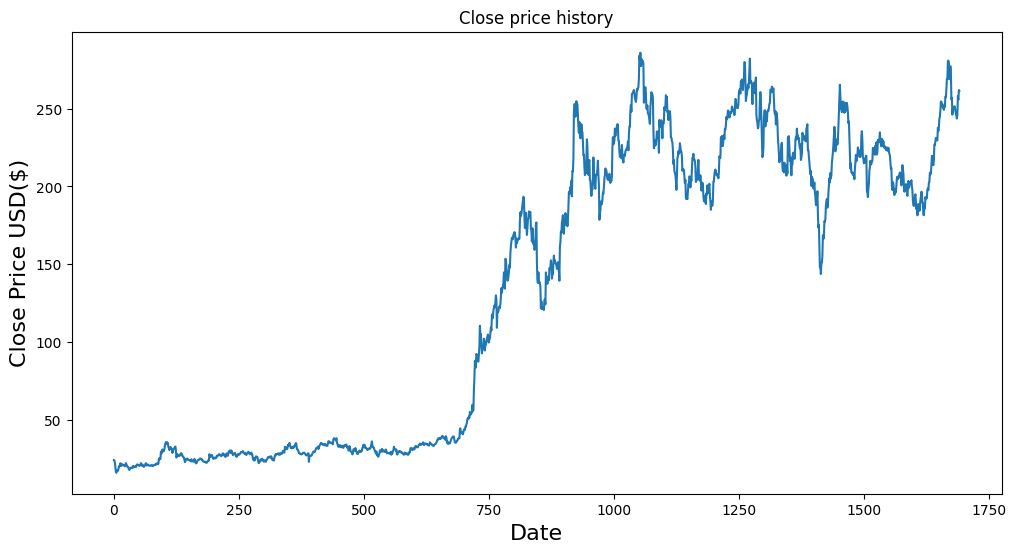

In [78]:
plt.figure(figsize=(12,6))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD($)', fontsize=16)
plt.show()

**Check for Null values**

In [79]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [80]:
data= df.filter(['Close']).values

**SCALING DATA USING MIN-MAX SCALER**

Min-Max Scaler is a pre-processing technique used in machine learning for rescaling a feature or a set of features to a specific range, typically between 0 and 1.

> The method works by transforming the values of the feature to a new scale, while preserving the relative proportions between the values. The rescaling is done by subtracting the minimum value in the feature from each data point and dividing the result by the range (the difference between the maximum and minimum value).




> This ensures that all the values in the feature are now in the specified range, with 0 being the minimum and 1 being the maximum



**Normalise data between 0 and 1 using MinMaxScaler**

In [81]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(data)

**Train the DATASET**

In [82]:
train_data = scaled_data [:int(len(scaled_data)*0.8)]
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [83]:
# Building a function Recurrent Neural Network with Keras
# Dropout is being used to prevent overfitting

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**Building LSTM model**

In [67]:
model= Sequential()     # Initializing the LSTM model

#Layer 1
model.add(LSTM(50,return_sequences= True, input_shape= (x_train.shape[1],1))) # Adding layers and defining the model
model.add(Dropout(0.2))                                                       # this model has 3 hidden layer

#Layer 2
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

#Layer 3
model.add(LSTM(50))
model.add(Dropout(0.2))

# Final Output layer
model.add(Dense(1))

# Compiling our neural network by choosing our loss functions and optimizer
# Adam optimizer

model.compile(optimizer= 'adam', loss='mean_squared_error')

# Training the model on the training data
model.fit(x_train, y_train , epochs= 50, batch_size=32)

Epoch 1/50
41/41 [==============================] - 11s 137ms/step - loss: 0.0310
Epoch 2/50
41/41 [==============================] - 4s 89ms/step - loss: 0.0053
Epoch 3/50
41/41 [==============================] - 4s 87ms/step - loss: 0.0045
Epoch 4/50
41/41 [==============================] - 4s 110ms/step - loss: 0.0043
Epoch 5/50
41/41 [==============================] - 4s 108ms/step - loss: 0.0040
Epoch 6/50
41/41 [==============================] - 4s 86ms/step - loss: 0.0037
Epoch 7/50
41/41 [==============================] - 4s 101ms/step - loss: 0.0037
Epoch 8/50
41/41 [==============================] - 6s 143ms/step - loss: 0.0035
Epoch 9/50
41/41 [==============================] - 4s 87ms/step - loss: 0.0033
Epoch 10/50
41/41 [==============================] - 4s 86ms/step - loss: 0.0035
Epoch 11/50
41/41 [==============================] - 5s 119ms/step - loss: 0.0033
Epoch 12/50
41/41 [==============================] - 4s 101ms/step - loss: 0.0031
Epoch 13/50
41/41 [==========

**Prediction on test data**

In [68]:
test_data= scaled_data[int(len(scaled_data)*0.8)- 60:]
x_test = []
y_test = data[int(len(data)*0.8):,:]

for i in range(60,len (test_data)):
    x_test.append (test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions =model.predict(x_test)

# using the inverse transform to get our real values back from the scaled values
predictions =scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 27ms/step


**Visualisation of actual vs predicted values**

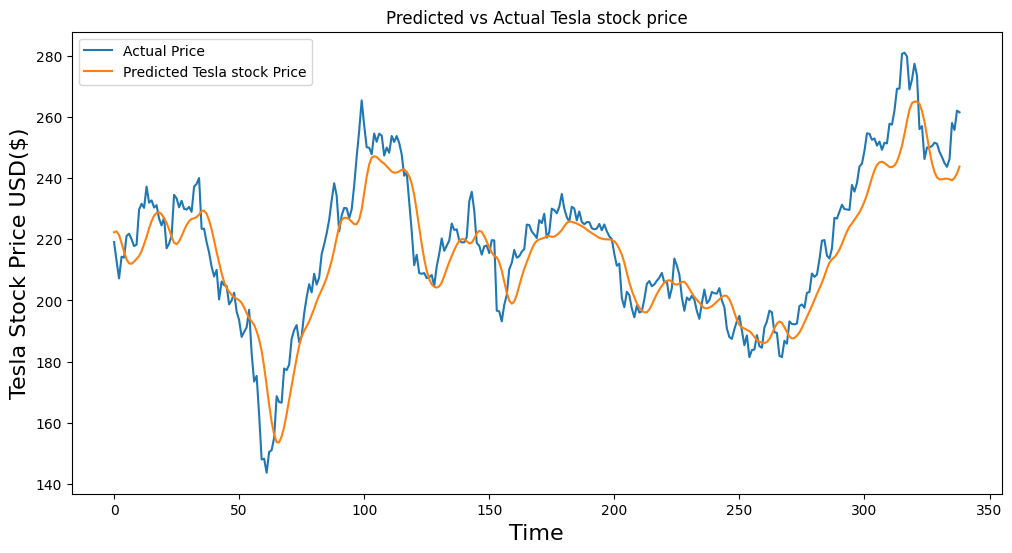

In [69]:
plt.figure(figsize=(12,6))
plt.title('Predicted vs Actual Tesla stock price')
plt.plot(y_test, label ='Actual Price')
plt.plot(predictions, label = 'Predicted Tesla stock Price')
plt.xlabel('Time', fontsize= 16)
plt.ylabel('Tesla Stock Price USD($)', fontsize=16)
plt.legend()
plt.show()